In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
from sklearn.cluster import KMeans

## Import Data

In [8]:
df = pd.read_csv('kmeansdata.csv')
df.head(10)

,Unnamed: 0,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",France,00:00:00.000,Starting XI,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Argentina,00:00:00.000,Starting XI,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,France,00:00:00.000,Half Start,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,00:00:00.000,Half Start,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,00:00:00.000,Half Start,NaN
5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,France,00:00:00.000,Half Start,NaN
6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,France,00:00:01.880,Pass,NaN
7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,France,00:00:06.440,Pass,NaN
8,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,00:00:47.040,Pass,NaN
9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,France,00:00:50.480,Pass,NaN


In [9]:
df.columns

Index(['Unnamed: 0', '50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_penalty', 'foul_won_advantage', 'foul_won_defensive',
       'foul_won_penalty', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'pass_aerial_won', 'pass_angle',
       'pass_assisted_shot_id', 'pass_backheel', 'pass_body_part',
       'pass_cross', 'pass_deflected', 'pass_end_location', 'pass_goal_assist',
       'pass_height', 'pass_length', 'pass_miscommunication', 

In [10]:
df = df[['team', 'type', 'location', 'pass_end_location']]
df.head(10)

,team,type,location,pass_end_location
0,France,Starting XI,NaN,NaN
1,Argentina,Starting XI,NaN,NaN
2,France,Half Start,NaN,NaN
3,Argentina,Half Start,NaN,NaN
4,Argentina,Half Start,NaN,NaN
5,France,Half Start,NaN,NaN
6,France,Pass,"[60.0, 42.0]","[33.0, 55.0]"
7,France,Pass,"[40.0, 53.0]","[87.0, 65.0]"
8,Argentina,Pass,"[31.0, 21.0]","[86.0, 22.0]"
9,France,Pass,"[37.0, 55.0]","[45.0, 75.0]"


In [11]:
df = df[(df['team']=='France') & (df['type']=='Pass')].reset_index()
df.head(10)

,index,team,type,location,pass_end_location
0,6,France,Pass,"[60.0, 42.0]","[33.0, 55.0]"
1,7,France,Pass,"[40.0, 53.0]","[87.0, 65.0]"
2,9,France,Pass,"[37.0, 55.0]","[45.0, 75.0]"
3,10,France,Pass,"[47.0, 75.0]","[28.0, 73.0]"
4,11,France,Pass,"[26.0, 67.0]","[8.0, 44.0]"
5,12,France,Pass,"[8.0, 42.0]","[12.0, 21.0]"
6,13,France,Pass,"[21.0, 25.0]","[24.0, 55.0]"
7,14,France,Pass,"[34.0, 63.0]","[49.0, 77.0]"
8,15,France,Pass,"[48.0, 78.0]","[62.0, 74.0]"
9,16,France,Pass,"[57.0, 66.0]","[54.0, 59.0]"


In [12]:
df[['x', 'y']] = df.location.str.split(expand=True)
df[['endX', 'endY']] = df.pass_end_location.str.split(expand=True)
df.head()

,index,team,type,location,pass_end_location,x,y,endX,endY
0,6,France,Pass,"[60.0, 42.0]","[33.0, 55.0]","[60.0,",42.0],"[33.0,",55.0]
1,7,France,Pass,"[40.0, 53.0]","[87.0, 65.0]","[40.0,",53.0],"[87.0,",65.0]
2,9,France,Pass,"[37.0, 55.0]","[45.0, 75.0]","[37.0,",55.0],"[45.0,",75.0]
3,10,France,Pass,"[47.0, 75.0]","[28.0, 73.0]","[47.0,",75.0],"[28.0,",73.0]
4,11,France,Pass,"[26.0, 67.0]","[8.0, 44.0]","[26.0,",67.0],"[8.0,",44.0]


In [13]:
df['x'] = df.loc[:,'x'] = df.x.map(lambda x: x[1: -1]).astype(float)
df['y'] = df.loc[:,'y'] = df.y.map(lambda x: x[0: -1]).astype(float)
df['endX'] = df.loc[:,'endX'] = df.endX.map(lambda x: x[1: -1]).astype(float)
df['endY'] = df.loc[:,'endY'] = df.endY.map(lambda x: x[0: -1]).astype(float)
df = df.drop(['location', 'pass_end_location'], axis=1)
df.head()

,index,team,type,x,y,endX,endY
0,6,France,Pass,60.0,42.0,33.0,55.0
1,7,France,Pass,40.0,53.0,87.0,65.0
2,9,France,Pass,37.0,55.0,45.0,75.0
3,10,France,Pass,47.0,75.0,28.0,73.0
4,11,France,Pass,26.0,67.0,8.0,44.0


## Implement the k-means

In [14]:
X = np.array(df[['x', 'y', 'endX', 'endY']])
kmeans = KMeans(n_clusters=10, random_state=100)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

In [15]:
df.head()

,index,team,type,x,y,endX,endY,cluster
0,6,France,Pass,60.0,42.0,33.0,55.0,1
1,7,France,Pass,40.0,53.0,87.0,65.0,5
2,9,France,Pass,37.0,55.0,45.0,75.0,5
3,10,France,Pass,47.0,75.0,28.0,73.0,4
4,11,France,Pass,26.0,67.0,8.0,44.0,4


In [16]:
df.cluster.value_counts()

1    49
5    48
2    48
6    47
0    46
4    30
7    25
3    24
9    19
8    14
Name: cluster, dtype: int64

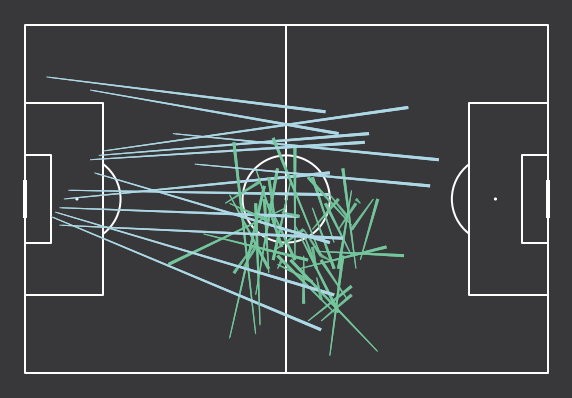

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('#38383b')
ax.patch.set_facecolor('#38383b')

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal', pitch_color='#38383b',
             line_color='white', figsize=(10,10), constrained_layout=False, tight_layout=True, view='full')

pitch.draw(ax=ax)

for x in range(len(df['cluster'])):
    if df['cluster'][x]==1:
        pitch.lines(xstart=df['x'][x], ystart=df['y'][x], xend=df['endX'][x], yend=df['endY'][x],
                   color='#74c69d', comet=True, zorder=2, lw=3, ax=ax)
    if df['cluster'][x]==8:
        pitch.lines(xstart=df['x'][x], ystart=df['y'][x], xend=df['endX'][x], yend=df['endY'][x],
                   color='#add8e6', comet=True, zorder=2, lw=3, ax=ax)